In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df= pd.read_csv("cancer_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Benign 357
Malignant 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


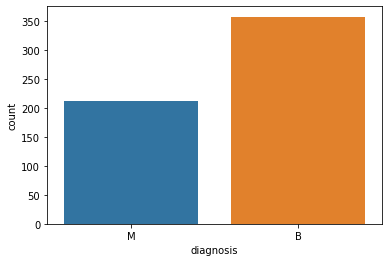

In [22]:
sns.countplot(df['diagnosis'])
B,M=df['diagnosis'].value_counts()
print('Benign',B)
print("Malignant",M)

plt.show()

In [29]:
del df['Unnamed: 32']

In [43]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values
X_tolist = X.tolist()

In [44]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
labelencoder= LabelEncoder()

In [45]:
y=labelencoder.fit_transform(y)

In [46]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=100)

In [74]:
sc=StandardScaler()

In [75]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [76]:
x_train

array([[-0.27914259,  0.01254364, -0.36045284, ..., -1.59146871,
        -0.75525301, -1.19510832],
       [-0.32838043,  2.26039928, -0.36509258, ..., -0.74909183,
        -0.87172233, -0.64301263],
       [ 0.50287016, -0.00850808,  0.67252257, ...,  1.57628782,
         2.38420358,  1.2444247 ],
       ...,
       [-0.68173433, -0.51141023, -0.73627198, ..., -1.09828224,
        -0.24765538, -0.8845907 ],
       [-0.33417311, -0.29387581, -0.33598874, ..., -0.52480233,
        -0.16421467, -0.25138966],
       [-1.36671957, -1.25289851, -1.315818  , ..., -0.62872991,
         1.40377528,  0.36501099]])

In [77]:
pip install keras

In [78]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [79]:
#adding the input and first hiddeb layer
classifier=Sequential()
classifier.add( Dense(units=16,kernel_initializer='uniform', activation='relu', input_dim=30))
classifier.add(Dense(units=16,kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',  activation='sigmoid'))


In [80]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
classifier.fit(x_train,y_train, batch_size=100,epochs=150)

Epoch 1/150
5/5 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4251
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.6869
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.7166
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.8096
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.8740
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.9248
Epoch 7/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.9435
Epoch 8/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.9188
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.9507
Epoch 10/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.9490
Epoch 11/150
5/5 [===========

In [82]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm=confusion_matrix(y_test,y_pred)

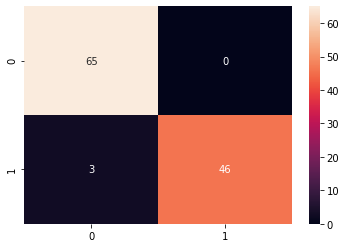

In [85]:
sns.heatmap(cm, annot=True)
plt.savefig('h.png')